In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zarr

# Open the group
dataset = zarr.open_group("../data/scenes/sample.zarr", mode='r')

# Access arrays inside
agents = dataset['agents']
frames = dataset['frames']
scenes = dataset['scenes']

print(f"Agents shape: {agents.shape}")
print(f"Frames shape: {frames.shape}")
print(f"Scenes shape: {scenes.shape}")


FILL VALUE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA= DT [('centroid', '<f8', (2,)), ('extent', '<f4', (3,)), ('yaw', '<f4'), ('velocity', '<f4', (2,)), ('track_id', '<u8'), ('label_probabilities', '<f4', (17,))]
FILL VALUE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA== DT [('timestamp', '<i8'), ('agent_index_interval', '<i8', (2,)), ('traffic_light_faces_index_interval', '<i8', (2,)), ('ego_translation', '<f8', (3,)), ('ego_rotation', '<f8', (3, 3))]
FILL VALUE AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA DT [('frame_index_interval', '<i8', (2,)), ('host', '<U16'), ('start_time', '<i8'), ('end_time', '<i8')]
Agents shape: (1893736,)
Frames shape: (24838,)

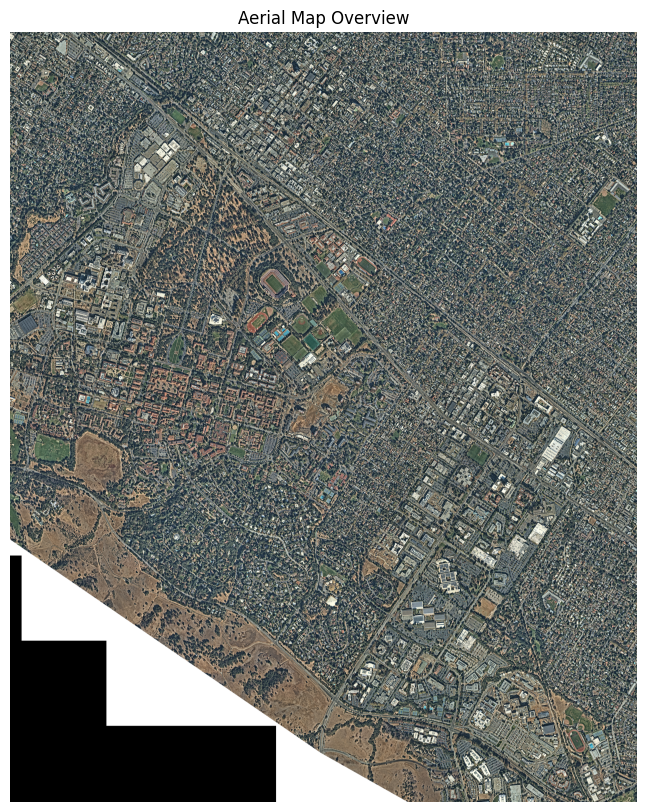

In [2]:
import matplotlib.image as mpimg

img = mpimg.imread('../data/aerial_map/aerial_map.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Aerial Map Overview')
plt.axis('off')
plt.show()


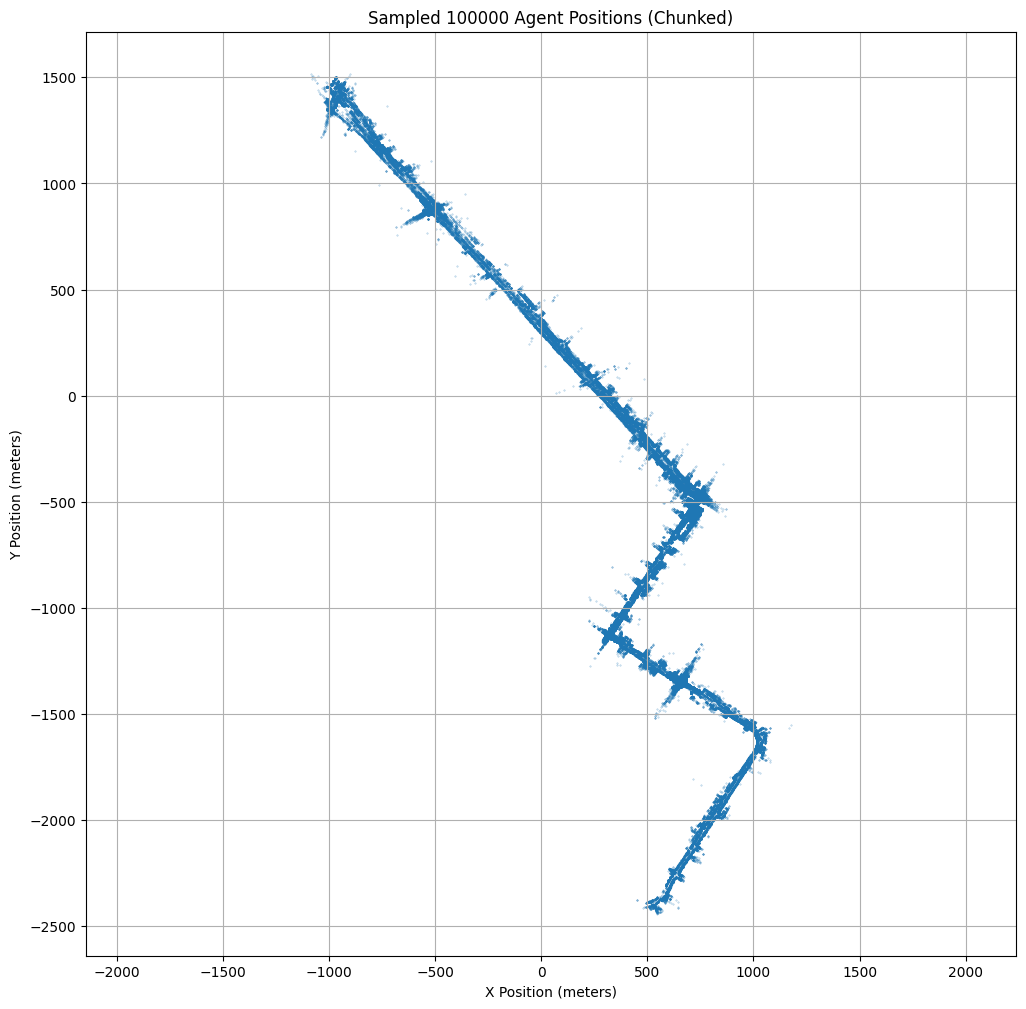

In [3]:
def plot_sampled_agents_chunked(agents, sample_size=100_000, chunk_size=5_000):
    n_agents = agents.shape[0]
    sample_indices = np.random.choice(n_agents, sample_size, replace=False)

    centroids = []

    for i in range(0, sample_size, chunk_size):
        chunk_indices = sample_indices[i:i+chunk_size]
        chunk = agents[chunk_indices]['centroid']
        centroids.append(chunk)

    centroids = np.concatenate(centroids, axis=0)

    plt.figure(figsize=(12, 12))
    plt.scatter(centroids[:, 0], centroids[:, 1], s=0.1, alpha=0.5)
    plt.title(f"Sampled {sample_size} Agent Positions (Chunked)")
    plt.xlabel("X Position (meters)")
    plt.ylabel("Y Position (meters)")
    plt.grid(True)
    plt.axis("equal")
    plt.show()

plot_sampled_agents_chunked(agents)


In [4]:
import numpy as np

# Function to pick Start and Goal
def pick_start_goal(centroids, min_dist=300, max_dist=800):
    while True:
        idx_start = np.random.choice(len(centroids))
        idx_goal = np.random.choice(len(centroids))

        start = centroids[idx_start]
        goal = centroids[idx_goal]

        dist = np.linalg.norm(start - goal)
        if min_dist <= dist <= max_dist:
            return start, goal, dist

# Pick start and goal
start, goal, dist = pick_start_goal(centroids)

print(f"Start Position (x,y): {start}")
print(f"Goal Position (x,y): {goal}")
print(f"Distance between Start and Goal: {dist:.2f} meters")


NameError: name 'centroids' is not defined